## Preprocess Data

In [29]:
import pandas as pd
import numpy as np

In [30]:
def preprocess(data_lines):
    for sent in data_lines:
        for word_data in sent:
            data = word_data.split()
            word = data[0]
            pos = data[1]
            ner_tag = data[-1]
            yield word, pos, ner_tag

with open('../datasets/NER/ner_data/train') as f:
    lines = f.readlines()

In [31]:
lines = ''.join(lines)

In [32]:
lines = lines.lower()


In [33]:
lines = lines.split('-docstart- -x- o o')

In [34]:
len(lines)

947

In [35]:
lines = [line.strip() for line in lines]

In [36]:
dlines = [line.split('\n') for line in lines] 

In [37]:
flattened = []
for para in dlines:
    for line in para:
        if line:
            flattened.append(line.split())

In [38]:
df = pd.DataFrame(flattened)

In [39]:
df.to_csv('../datasets/NER/prep_train.csv')

In [40]:
df.head()

,0,1,2,3
0,eu,nnp,i-np,i-org
1,rejects,vbz,i-vp,o
2,german,jj,i-np,i-misc
3,call,nn,i-np,o
4,to,to,i-vp,o


In [41]:
flattened = []
for para in dlines:
    words_in_line  = []
    for line in para:
        if line:
            word = line.split()[0]
            words_in_line.append(word)
    flattened.append(words_in_line)

In [42]:
from gensim.models import Word2Vec

In [43]:
model = Word2Vec(flattened,min_count=1, size=50, workers=4)

In [44]:
model.save('../models/ner_word_to_vec50')

In [45]:
model.most_similar('britain')

[('belgium', 0.9993789196014404),
 ('15-12', 0.9985662698745728),
 ('men', 0.9984050989151001),
 ('pounds', 0.9981710910797119),
 ('toyota', 0.998096227645874),
 ('metres', 0.9976305365562439),
 ('hill', 0.9975293874740601),
 ('rabobank', 0.9970297813415527),
 ('anders', 0.996955931186676),
 ('williams', 0.9969029426574707)]

In [46]:
words_unique = df[0].unique()
pos1_unique = df[1].unique()
pos2_unique = df[2].unique()
ner_tag_unique = df[3].unique()

In [47]:
len(words_unique), len(pos1_unique), len(pos2_unique), len(ner_tag_unique)

(21009, 45, 17, 8)

In [104]:
def word_to_tensor(word):
    if word in model.wv:
        return model.wv[word]
    else:
#         print('not in model')
        return np.random.rand(model.vector_size).astype(np.float32)
word_to_tensor('hello')

array([ 0.19610199,  0.36634412,  0.37448475,  0.28899369,  0.50808477,
        0.12252712,  0.23630257,  0.84013253,  0.0398668 ,  0.95358223,
        0.22630259,  0.73313618,  0.52588075,  0.1085002 ,  0.81756812,
        0.69893545,  0.50664914,  0.41141805,  0.82464719,  0.29948178,
        0.33172587,  0.17498596,  0.13708961,  0.14883095,  0.02761589,
        0.91030473,  0.38769689,  0.08415267,  0.51086742,  0.31247234,
        0.07131792,  0.39750078,  0.13482596,  0.99242491,  0.84296721,
        0.41715375,  0.22690408,  0.08056165,  0.33271489,  0.55464542,
        0.13982174,  0.38572928,  0.91170478,  0.10298305,  0.74147236,
        0.17546977,  0.97546738,  0.97363341,  0.12150187,  0.9990142 ], dtype=float32)

In [49]:
pos1_to_ix = {}
ix_to_pos1 = {}
pos2_to_ix = {}
ix_to_pos2 = {}

for i in range(len(pos1_unique)):
    pos1_to_ix[pos1_unique[i]]  = i
    ix_to_pos1[i] = pos1_unique[i]
    
for i in range(len(pos2_unique)):
    pos2_to_ix[pos2_unique[i]]  = i
    ix_to_pos2[i] = pos2_unique[i]

In [50]:
ix_to_ner = {}
ner_to_ix = {}

for i in range(len(ner_tag_unique)):
    ner_to_ix[ner_tag_unique[i]] = i
    ix_to_ner[i] = ner_tag_unique[i]

In [51]:
pos2_to_ix

{'b-adjp': 16,
 'b-advp': 14,
 'b-np': 4,
 'b-pp': 10,
 'b-sbar': 15,
 'b-vp': 9,
 'i-adjp': 6,
 'i-advp': 7,
 'i-conjp': 11,
 'i-intj': 12,
 'i-lst': 13,
 'i-np': 0,
 'i-pp': 3,
 'i-prt': 8,
 'i-sbar': 5,
 'i-vp': 1,
 'o': 2}

In [23]:
split_lines = [line.split('\n\n') for line in lines]

### Prepare Vectors and data segregation

In [24]:
flat_para = []
X_words = []
X_pos1 = []
X_pos2 = []
y_ner = []
for ess in split_lines:

    for para in ess:
        
        chunks = para.split('\n')
#         print(chunks)
        words = []
        pos1 = []
        pos2 = []
        ner = []
        for part in chunks:
            if part:
                word, pos1_tag, pos2_tag, ner_tag = part.split()
                words.append((word,pos1_tag,pos2_tag))
                pos1.append(pos1_tag)
                pos2.append(pos2_tag)
                ner.append(ner_tag)

        X_words.append(words)

        y_ner.append(ner)
        
print(X_words[:5])
print(y_ner[:5])

[[('eu', 'nnp', 'i-np'), ('rejects', 'vbz', 'i-vp'), ('german', 'jj', 'i-np'), ('call', 'nn', 'i-np'), ('to', 'to', 'i-vp'), ('boycott', 'vb', 'i-vp'), ('british', 'jj', 'i-np'), ('lamb', 'nn', 'i-np'), ('.', '.', 'o')], [('peter', 'nnp', 'i-np'), ('blackburn', 'nnp', 'i-np')], [('brussels', 'nnp', 'i-np'), ('1996-08-22', 'cd', 'i-np')], [('the', 'dt', 'i-np'), ('european', 'nnp', 'i-np'), ('commission', 'nnp', 'i-np'), ('said', 'vbd', 'i-vp'), ('on', 'in', 'i-pp'), ('thursday', 'nnp', 'i-np'), ('it', 'prp', 'b-np'), ('disagreed', 'vbd', 'i-vp'), ('with', 'in', 'i-pp'), ('german', 'jj', 'i-np'), ('advice', 'nn', 'i-np'), ('to', 'to', 'i-pp'), ('consumers', 'nns', 'i-np'), ('to', 'to', 'i-vp'), ('shun', 'vb', 'i-vp'), ('british', 'jj', 'i-np'), ('lamb', 'nn', 'i-np'), ('until', 'in', 'i-sbar'), ('scientists', 'nns', 'i-np'), ('determine', 'vbp', 'i-vp'), ('whether', 'in', 'i-sbar'), ('mad', 'jj', 'i-np'), ('cow', 'nn', 'i-np'), ('disease', 'nn', 'i-np'), ('can', 'md', 'i-vp'), ('be', 'v

### prepare vectors

In [25]:
""" Prepare X vectors"""
def convert_to_vec(X_words):
    X = []
    for sent in X_words:
        X_val = []
        for word in sent:
            wv = model.wv[word[0]]
            wv_val = wv.tolist()
            wv_val.append(pos1_to_ix[word[1]])
            wv_val.append(pos2_to_ix[word[2]])
            X_val.append(wv_val)
        
#         print(X_val)
        X.append(X_val)
    return X
        
    
X = convert_to_vec(X_words)

In [26]:
''' One hot vectors for some other framework not required in pytorch'''
def convert_ner_vec(ner):
    vec = [0]*8
    vec[ner] = 1
    return vec
convert_ner_vec(1)

[0, 1, 0, 0, 0, 0, 0, 0]

In [27]:
'''Prepare y vectors '''
def convert_y_vec(y_vec):
    y = []
    for val in y_vec:
        y_val = []
        for v in val:
            y_val.append(ner_to_ix[v])
        y.append(y_val)
    return y
y = convert_y_vec(y_ner)

In [28]:
X_np = np.array(X)
y_np = np.array(y)
print(X_np.shape)
print(y_np.shape)

(14042,)
(14042,)


In [29]:
y[0]

[0, 1, 2, 1, 1, 1, 2, 1, 1]

In [98]:
''' Train and validation set '''
def train_test_split(X,y, train_ratio=0.9):
    split_index = int(len(X)*train_ratio) 
    train_X = X[:split_index]
    train_y = y[:split_index]
    test_X = X[split_index:]
    test_y = y[split_index:]
    return train_X, test_X, train_y, test_y

#### Some dimensionality checks for self  assurance XD

In [31]:
np.array(X[0]).shape

(9, 52)

In [32]:
np.array(y[0]).shape

(9,)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np)
print(len(X_train), len(X_test), len(y_train), len(y_test))

12637 1405 12637 1405


In [100]:
np.array(y_train[0]).shape

(9,)

## Time for Torch

In [111]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

In [112]:
class RNN(nn.Module):
    def __init__(self,input_size, hidden_size,output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, 100)
        self.l1 = nn.Linear(100,50)
        self.l2 = nn.Linear(50,10)
        self.l3 =nn.Linear(10,output_size)
        
    def initHidden(self):
        return Variable(torch.zeros(1,self.hidden_size))
    
    def forward(self, input, hidden):
        combined = torch.cat((input,hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = F.relu(self.l1(output))
        output = F.relu(self.l2(output))
        output = F.softmax(self.l3(output))
        return output, hidden

In [103]:
INPUT_SIZE = 52
HIDDEN_SIZE = 256
OUTPUT_SIZE = 8
learning_rate = 1e-3

In [140]:
# can ignore this cell meant for validation after all torch supports DCG

# trial_val = Variable(torch.Tensor(X[0][1]).unsqueeze(0))
# print(trial_val.size())
# trial_hidden = rnn.initHidden()
# print(trial_hidden.size())
# output, hidden = rnn(trial_val, trial_hidden)
# print(output.size())
# print(hidden.size())
# criterion(output,Variable( torch.Tensor(y[0][1]).long()))

torch.Size([1, 52])
torch.Size([1, 256])
torch.Size([1, 8])
torch.Size([1, 256])


Variable containing:
 2.0861
[torch.FloatTensor of size 1]

In [43]:
import matplotlib.pyplot as plt

# Final Training

In [106]:
%%time

INPUT_SIZE = 52
HIDDEN_SIZE = 128
OUTPUT_SIZE = 8
learning_rate = 5e-3

rnn = RNN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(),lr=learning_rate)
num_epochs = 10
all_losses = []

losses = []
iter_losses = []
for i in range(num_epochs):
    iter_loss = []
    optimizer.zero_grad()
    for j in range(len(X_train)):
        loss_per_sample = []
        
        hidden = rnn.initHidden()
        for k in range(len(X_train[j])):
            inputs = Variable(torch.Tensor(X_train[j][k]).unsqueeze(0))
#             print(y_train[i][j])
            targets = Variable(torch.Tensor([y_train[j][k]]).long())            
            output, hidden = rnn(inputs,hidden)
#             print(output.size())
            loss = criterion(output, targets)
            loss_per_sample.append(loss.data[0])
            loss.backward(retain_graph=True)
        
        all_losses.extend(loss_per_sample)
        iter_loss.append(np.average(loss_per_sample))
    optimizer.step()
    losses.append(np.average(all_losses))
    iter_losses.append(iter_loss)
    print('Epoch ', i, 'Avg loss', losses[i])
            

Epoch  0 Avg loss 2.0894403616
Epoch  1 Avg loss 2.04145355984
Epoch  2 Avg loss 1.90388846487
Epoch  3 Avg loss 1.80077001527
Epoch  4 Avg loss 1.73451424841
Epoch  5 Avg loss 1.68860841941
Epoch  6 Avg loss 1.65501919779
Epoch  7 Avg loss 1.6294387786
Epoch  8 Avg loss 1.60934497502
Epoch  9 Avg loss 1.59316476928
CPU times: user 5h 27min 44s, sys: 1min 41s, total: 5h 29min 26s
Wall time: 2h 16min 52s


### When u know what to plot

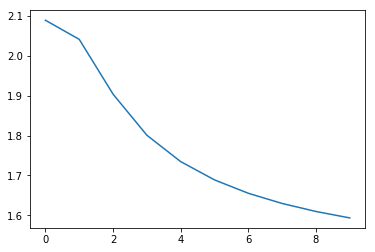

In [130]:
plt.plot(losses)
plt.show()

In [109]:
torch.save(rnn.state_dict(), '../models/ner.pth')

In [110]:
def evaluate(model,X_test,y_test):
    model.eval()
    correct = 0.0
    count = 0.0
    print(np.array(X_test).shape)
    for i in range(len(X_test)):

        hidden = model.initHidden()
        for j in range(len(X_test[i])):
            count += 1
            inputs = Variable(torch.Tensor(X_test[i][j]).unsqueeze(0))
            output, hidden = model(inputs, hidden)
#             print(output.topk(1)[1].data[0][0])
            if output.topk(1)[1].data[0][0] == y_test[i][j]:
                correct += 1
            
    print(correct)
    print(count)
    print('Test Acc.', correct/ count)

In [155]:
# for i in range(len(X_test[:1])):
#     for j in range(len(X_test[i])):
#         print(X_test[i][j])


evaluate(rnn,X_test,y_test)
# print(y_test[2:3])

(1405,)
21685.0
24803.0
Test Acc. 0.8742894004757489


In [ ]:
Test Data

In [20]:
wv_model = Word2Vec.load('../models/ner_word_to_vec50')
wv_model.most_similar('britain')

[('belgium', 0.9981899261474609),
 ('toyota', 0.9979879856109619),
 ('stated', 0.997677743434906),
 ('russia', 0.9975883364677429),
 ('unless', 0.9973466992378235),
 ('philippoussis', 0.9972662329673767),
 ('u.s.', 0.9969862699508667),
 ('metres', 0.9967542886734009),
 ('yamaha', 0.9964815974235535),
 ('4-0', 0.9964807033538818)]

## Prepare testing data  


In [ ]:
''' some redundant code will cleanup later its 3:41 AM XD  '''

In [84]:
import re
with open('../datasets/NER/ner_data/test') as f:
    lines = f.readlines()

lines = ''.join(lines)
lines = lines.lower()
lines = ''.join(lines)
lines = re.sub('-docstart- -x- -x- o', '', lines)
# print(lines[:1])
split_lines = lines.split('\n\n')
split_lines = [line for line in split_lines if line]
sent_lines = []
for splits in split_lines:
    sent_lines.append(splits.split('\n'))

# print(len(split_lines))
# print(split_lines[:10])

# print(len(sent_lines))
# print(sent_lines[:10])
flat_para = []
X_words = []
X_pos1 = []
X_pos2 = []
y_ner = []

for para in sent_lines:
#     print(para)
#     chunks = para.split('\n')
#     print(chunks)
    words = []
    pos1 = []
    pos2 = []
    ner = []

    for part in para:

        if part:
            word, pos1_tag, pos2_tag, ner_tag = part.split()
            words.append((word,pos1_tag,pos2_tag))
            pos1.append(pos1_tag)
            pos2.append(pos2_tag)
            ner.append(ner_tag)
    if words:
        X_words.append(words)

        y_ner.append(ner)

In [85]:
print(len(X_words),len(y_ner))

3453 3453


In [91]:
X_words[0],  y_ner[0], len(y_ner[0])

([('soccer', 'nn', 'i-np'),
  ('-', ':', 'o'),
  ('japan', 'nnp', 'i-np'),
  ('get', 'vb', 'i-vp'),
  ('lucky', 'nnp', 'i-np'),
  ('win', 'nnp', 'i-np'),
  (',', ',', 'o'),
  ('china', 'nnp', 'i-np'),
  ('in', 'in', 'i-pp'),
  ('surprise', 'dt', 'i-np'),
  ('defeat', 'nn', 'i-np'),
  ('.', '.', 'o')],
 ['o', 'o', 'i-loc', 'o', 'o', 'o', 'o', 'i-per', 'o', 'o', 'o', 'o'],
 12)

In [106]:
"""Prepare test tensor"""
def val_to_tensor(value):
    tensor = []
    for val in value:
        
        wv = word_to_tensor(val[0]).tolist()
        wv.append(pos1_to_ix[val[1]])
        wv.append(pos2_to_ix[val[2]])
        tensor.append(wv)
    return tensor
np.array(val_to_tensor(X_words[0])).shape

(12, 52)

In [107]:
X_test_set = [val_to_tensor(X) for X in X_words]
y_test_set = convert_y_vec(y_ner)

In [109]:
print(len(X_test_set))

3453


In [108]:
print(np.array(y_test_set).shape)

(3453,)


In [114]:

INPUT_SIZE = 52
HIDDEN_SIZE = 128
OUTPUT_SIZE = 8
learning_rate = 5e-3
model = RNN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)


In [116]:
model.load_state_dict(torch.load('../models/ner.pth'))

In [117]:
evaluate(model, X_test_set, y_test_set)

(3453,)
38250.0
46435.0
Test Acc. 0.8237320986324971
